# __Feature Engineering__

---

1. Import packages
2. Load data
3. Feature engineering
4. Modelling (Development and Evaluation)

---

## __1. Import packages__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## __2. Load data__

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. __Feature engineering__

__Difference between off-peak prices in December and preceding January__

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

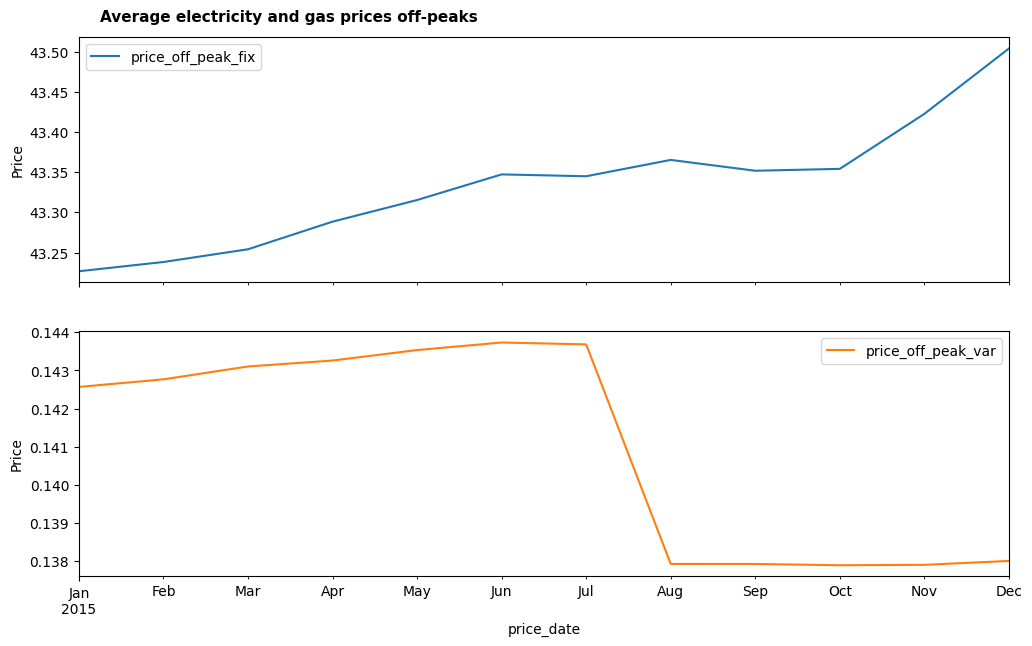

In [6]:
price_df.resample('MS', on='price_date')[['price_off_peak_fix', 'price_off_peak_var']].mean().plot(
    subplots=True, figsize=(12,7), ylabel='Price')
plt.suptitle('Average electricity and gas prices off-peaks', x=0.3, y=0.92, fontsize=11, fontweight='bold')
plt.show()

We will create 

- The average electricity and gas prices of each client over the 12-month period
- The difference in price between the last 5-month and the 5-months preceding it
- The number of days from contract modification to the next renewal of the contract
- The number of days from contract modification to start and end of contract
- Duration of signed contract
- Total electricity consumption 
- A binary variable that indicates if a customer subscribed to electricity billing
- A binary variable to indicate if a customer has a current paid consumption (imp_cos)

__Average electricity and gas prices over the 12-month period__

In [7]:
# average gas and electricity prices off peak, during peak and on mid-peak periods
mean_prices = (
    price_df.drop('price_date', axis=1).groupby('id').mean()
    .rename({i:'mean_'+i for i in price_df.columns if 'fix' in i or 'var' in i}, axis=1)
    .merge(df, on='id', how='right')
    .filter(regex='mean|^id$')
 )

__Electricity and gas price change the past n-months and the months preceding it__

In [8]:
def price_change(df, n_months=6):
    """
    Calculates the average gas and electricity bill last n months and checks their difference
    """
    last_n_month = df.set_index('price_date').groupby('id').nth(range(-n_months,0)).groupby('id').mean()
    prev_n_month = df.set_index('price_date').groupby('id').nth(range(-n_months*2,-n_months)).groupby('id').mean()
    price_diff = (last_n_month - prev_n_month)
    price_diff.columns = [i+f'_{n_months}m_diff' for i in price_diff.columns]
    return price_diff

In [9]:
# energy and power price last 6 months
price_diff = price_change(price_df, 6)

__Price fluctuation__

Average monthly change in energy and power prices

In [10]:
# get the average price difference over the year
price_fluctuation = price_df.set_index('price_date').groupby('id').apply(lambda x: x.diff().mean())
price_fluctuation.columns = [i+'_avg_price_chg' for i in price_fluctuation.columns]

__Date features extraction__

- Number of months from start of contract to contract modification
- Number of months from contract modification to end of contract
- Number of months from contract modification to next contract renewal
- Contract duration (in months)

In [11]:
df = df.assign(
    cont_mod_activ_month = (df.date_modif_prod - df.date_activ).dt.days / 30,
    cont_mod_end_num = (df.date_end - df.date_modif_prod).dt.days / 30,
    cont_mod_renew_num = (df.date_renewal - df.date_modif_prod).dt.days / 30,
    cont_duration = (df.date_end - df.date_activ).dt.days / 30
)


__Total electricity consumed__

In [12]:
df['total_cons_elec'] = df[['cons_12m', 'cons_last_month']].sum(1)

__is not Electricity subscriber and has current paid consumption__

In [13]:
df['no_elec'] = np.where(df['total_cons_elec'] > 0, 'f', 't')
df['has_paid_cons'] = np.where(df.imp_cons > 0, 't', 'f')

__Merging data to main dataset__

In [14]:
df = (
    df
    .merge(diff, on='id')
    .merge(mean_prices, on='id', how='left')
    .merge(price_diff, on='id', how='left')
    .merge(price_fluctuation, on='id', how='left')
    .set_index('id'))

__Handling categorical variables__

- We will one hot encode categorical variables with more than 2 categories and convert to binary variables categorical variables with 2 categories

In [15]:
binary_map = {'f':0, 't':1}

In [16]:
df[['has_gas', 'has_paid_cons', 'no_elec']] = df[['has_gas', 'has_paid_cons', 'no_elec']].apply(
    lambda x: [binary_map.get(i) for i in x]
)

In [17]:
# recoding the sales channel and electricity campaign type of customer
channel_map = {j:f'cs{i}' for i, j in enumerate(np.sort(df.channel_sales.unique()), start=1)}
origin_up_map = {j:f'ct{i}' for i, j in enumerate(np.sort(df.origin_up.unique()), start=1)}

In [18]:
# recoding the categorical variables
df = df.assign(channel_sales = df.channel_sales.map(channel_map), 
               origin_up = df.origin_up.map(origin_up_map))

In [19]:
df = pd.get_dummies(df, dtype='int')

__Selecting relevant features__

- We will be dropping the date features

In [20]:
# select relevant variables
df = df.drop(columns=[col for col in df.columns if 'date' in col])

__Checking for multicolinearity__

In [21]:
corr = df.loc[:, (df.nunique() != 2)].corr()

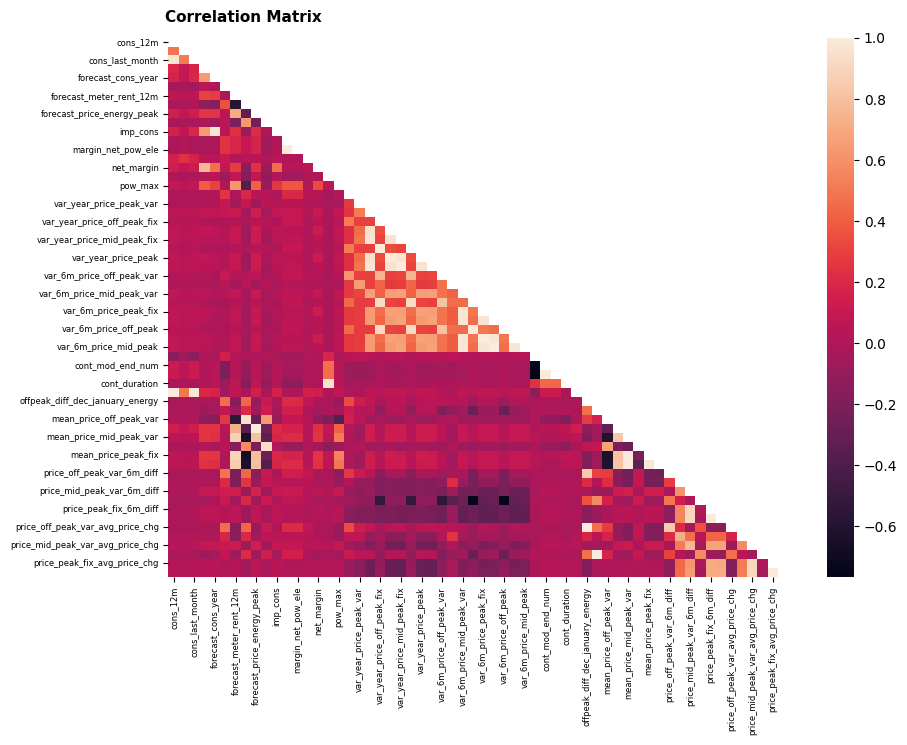

In [22]:
fig, ax = plt.subplots(1, figsize=(10,7))
sns.heatmap(corr, mask=np.triu(corr), ax=ax)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
fig.suptitle('Correlation Matrix', x=0.2, fontsize=11, fontweight='bold', y=0.92)
plt.show()

- We will drop the cons_12m and cons_last_month variables since they were combined to obtain the total electricity used by a customer. We will create a binary variable to indicate if the customer paid for electricity consumption last month

In [23]:
df = df.assign(has_elec_last_month = np.where(df.cons_last_month > 0, 1, 0))

In [24]:
# drop multicolinear features
df = df.drop(columns=['cons_12m', 'cons_last_month', 'margin_net_pow_ele'])

---

## 4. __Modelling__

Here, we will train a random forest model to predict the probability of churn. We will use the area under the receiver's operating characteristics curve (AUROC) to investigate the performance of our model. Firstly, we will need to split the whole data into training and test sets. The training data will be used to fit a random forest model while the test data will be used to evaluate its performance. For optimisation, the AUROC will be used. However, splitting will be done in a stratified manner since from the data exploration, we see that there's a class imbalance.

### Splitting into train and test sets

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier

In [26]:
seed = 123

In [27]:
train, test = train_test_split(df, stratify=df.churn, test_size=0.2, random_state=seed)

In [28]:
TARGET = 'churn'

In [29]:
xtrain, ytrain = train.drop(TARGET, axis=1), train[TARGET]
xtest, ytest = test.drop(TARGET, axis=1), test[TARGET]

### Model Development

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

In [31]:
rf = RandomForestClassifier(random_state=seed, n_estimators=450, min_samples_leaf=2, 
                            min_samples_split=3, max_samples=0.8, max_features=0.2)

__Cross validation to estimate model's performance on test data__

Using a 5-fold cross validation approach we will fit a random forest model by splitting the training data into 5-folds, where at each iterations, 4/5th of the data is used to train a model while the rest 1/5th (validation set) to evaluate model's peformance.

In [32]:
# 5 fold cross validation
res = cross_val_score(rf, xtrain, ytrain, scoring='roc_auc', cv=cv)

In [33]:
res

array([0.68997014, 0.6683143 , 0.70722279, 0.68369   , 0.6758386 ])

In [34]:
print(f'{res.mean():.3f}  +- {res.std():.3f}')

0.685  +- 0.013


In [35]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_features=0.2, max_samples=0.8, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=450, random_state=123)

### Model Evaluation

- Evaluate on test data

In [36]:
# get model probabilities and predictions
probs = rf.predict_proba(xtest)[:,1]
predictions = rf.predict(xtest)

In [37]:
# roc value on test data
roc_auc_score(ytest, probs)

0.6827835855161293

In [38]:
# model metrics
print(classification_report(ytest, rf.predict(xtest), target_names=['Churn-No', 'Churn-Yes']))

              precision    recall  f1-score   support

    Churn-No       0.91      1.00      0.95      2638
   Churn-Yes       1.00      0.04      0.08       284

    accuracy                           0.91      2922
   macro avg       0.95      0.52      0.52      2922
weighted avg       0.92      0.91      0.87      2922



### Model Diagnostics

In [39]:
# get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=rf.feature_names_in_).sort_values()

In [40]:
top_20 = feature_importance.tail(20)

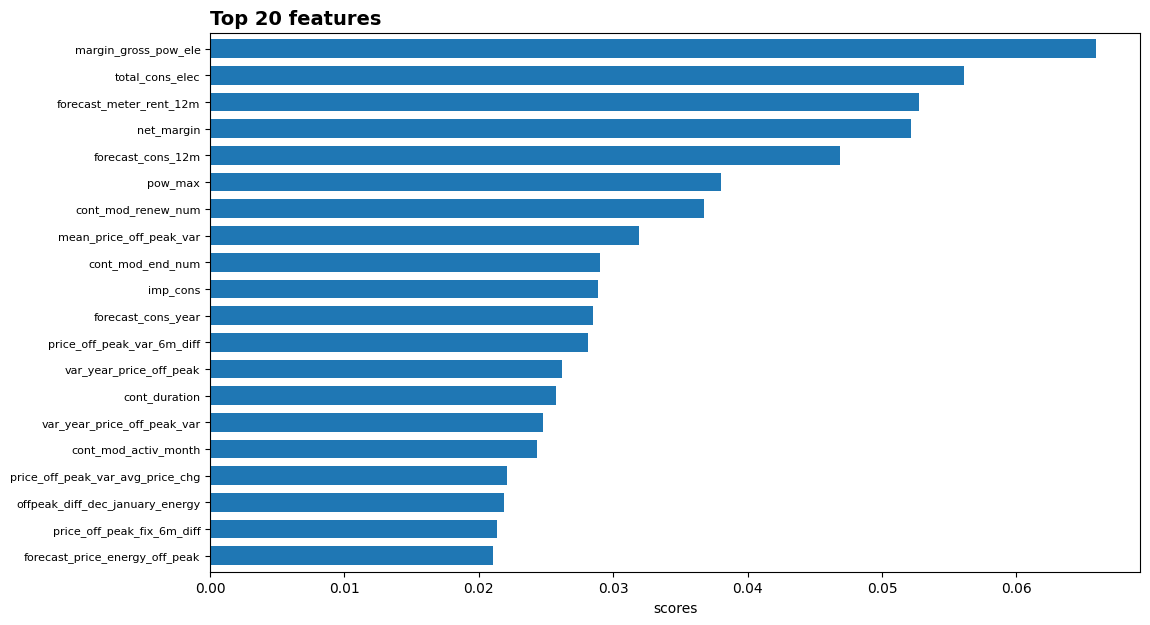

In [41]:
top_20.plot.barh(figsize=(12,7), width=0.7)
plt.xlabel('scores')
plt.yticks(fontsize=8)
plt.title('Top 20 features', fontsize=14, fontweight='bold', loc='left')
plt.show()

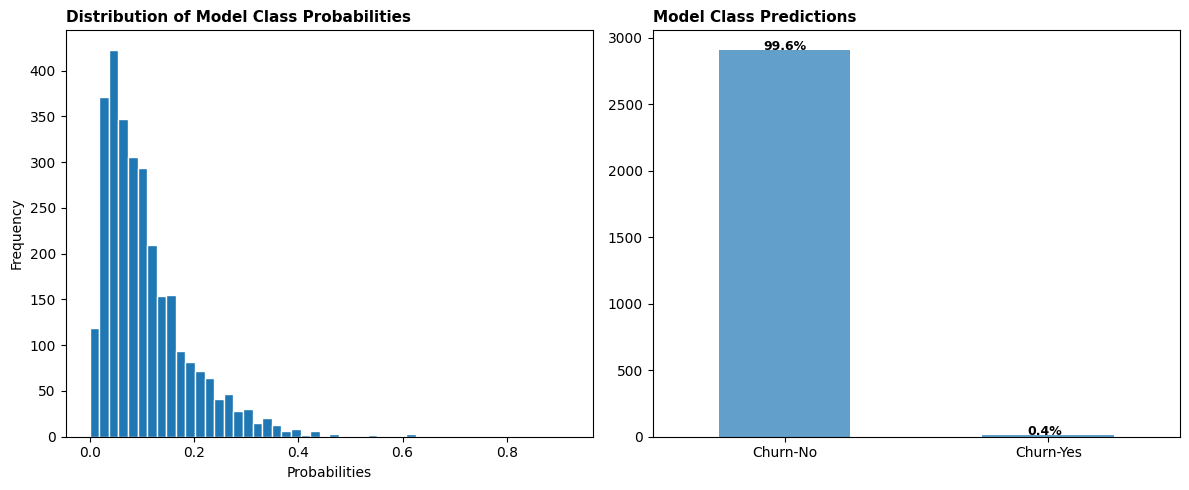

In [42]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].hist(probs, bins=50, edgecolor='w')
ax[0].set_title('Distribution of Model Class Probabilities', loc='left', fontsize=11, fontweight='bold')
ax[0].set(ylabel='Frequency', xlabel='Probabilities')

a = pd.Series(predictions).value_counts().plot(kind='bar', rot=0, ax=ax[1], alpha=0.7)
ax[1].set_title('Model Class Predictions', loc='left', fontsize=11, fontweight='bold')
for i in a.patches:
    val = 100*i.get_height()/len(predictions)
    ax[1].annotate(f'{val:.1f}%', (i.get_x()+0.17, i.get_height()), fontweight='bold', fontsize=9)
plt.xticks(range(2), ['Churn-No', 'Churn-Yes'])

fig.tight_layout()
plt.show()

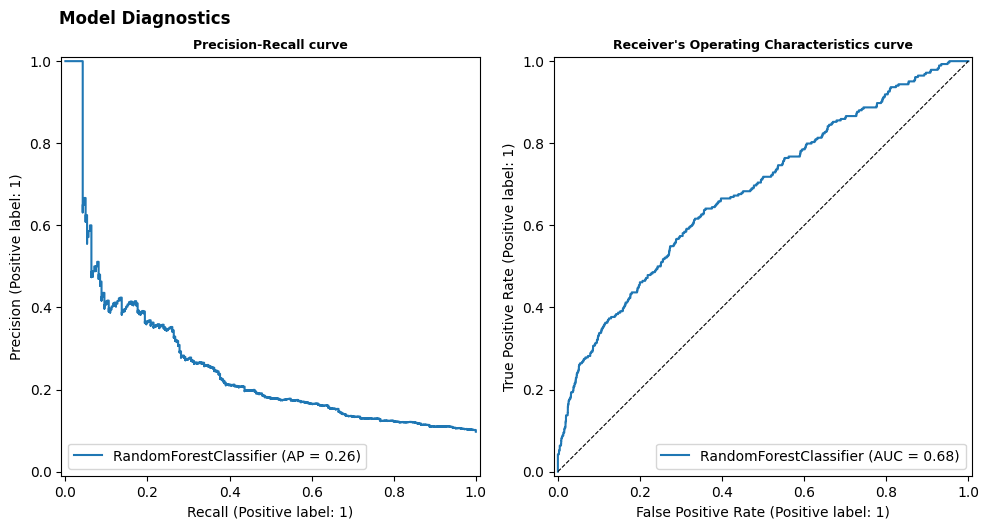

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
PrecisionRecallDisplay.from_estimator(rf, xtest, ytest, ax=ax[0])
ax[0].set_title('Precision-Recall curve', fontsize=9, fontweight='bold')
RocCurveDisplay.from_estimator(rf, xtest, ytest, pos_label=1, ax=ax[1])
ax[1].plot([0,1], [0,1], 'k--', lw=0.8)
ax[1].set_title('Receiver\'s Operating Characteristics curve', fontsize=9, fontweight='bold')
fig.suptitle('Model Diagnostics', fontweight='bold', fontsize=12, x=0.15, y=0.9)
fig.tight_layout()
plt.show()

## 5. __Summary and Conclusion__

Here, we fit a random forest model to predict the probability that a customer would churn from PowerCo. Feature engineering techniques were performed to preprocess data and generate features that could have predictive power. After that, the dataset was split into training and test data where the train data was used to develop a predictive model and the test used to evaluate the performance of the model. 

To estimate the performance of the model on the test set, a 5-fold crossvalidation was performed where 4/5th of the training data was used for training and the remaining 1/5th to evaluate performance. This was done in 5-iterations. Evaluation was done using the area under the receiver's operating characteristics curve (AUROC). After cross-validation, an AUROC score of 0.685 was obtained on average on the validation set used during crossvalidation. After this, the random forest model was fit on the whole training data and then evaluated on the heldout test data. 

From the result, an AUROC score of 0.682 was obtained. Further diagnostic metrics on the model's performance on the test data were obtained. These metrics include the accuracy, recall and precision and the area under the precision-recall curve (AUPRC). Due to the high imbalance in the data, accuracy is not the best metric to use to evaluate model's performance because there's a bias in the model where it tends to focus on the majority class while "paying less attention" to the minority class. However, from the AUROC obtained, the random forest model tends to be doing pretty well at predicting the probabilities of churn, since its AUROC value is higher than that that would be obtained by a random model (AUROC = 0.5). Moving on to the distribution of the predicted probabilities, it is found that the model predicts less probabilities of customers churning (probabilities mostly less than 0.2) while out of the total samples on the test data, less than 1% were predicted to have a high probability to churn.

In addition to this, the top 20 features used by the model for predictions were obtained. These features include the following

- Gross margin on power subscription
- The total amount of power/electricity consumed by the clients
- The forecasted bill of meter rental for the next 12 months
- the total net margin
- forecasted electricity consumption for the next 12 months
- The subscribed power
- the number of months from the date of contract modification till the date of next contract renewal
- The average off-peak energy price
- The number of months from the date of last contract modification till date of the end of contract
- The current paid consumption
- The forecasted electricity consumption for the next calendar year
- The off-peak energy price difference between the last 6 months and the other 6 months preceding it.
- The yearly off-peak energy price
- The duration of contract
- The variance in the yearly off-peak energy price
- The number of months from the activation date to last date of contract modification
- The average off-peak energy price change in a year
- The difference between the off-peak energy price from January of current year and December of preceding year
- The off-peak power price difference between the last 6 months and the 6 months preceding it
- Foreasted off-peak energy price

In conclusion, random model isn't very appropriate at predicting the probabilities of churning. This is mostly as a result of the class imbalance in the dataset. Techniques used for solving the class imbalance problem may be applied to remove model bias and improve the model's sensitivity on the class of interest (churn). Similarly, as we see from the top 20 features, energy or power cost is one reason why customers are likely to churn. Others include the duration of the contract, number of months from last date of contract modification to end of contract or from date of activation and the change in energy or power price per year, etc. As a result, strategies need to be set up to entice customers to stay. One would be to offer subscription discounts or provide products suitable for these likely-to-churn customers.